# Heading goes here

###  Maybe more stuff

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from pprint import pprint
import seaborn as sns


fire_df = pd.read_csv('fire_data.csv', index_col=[0])

In [93]:
temp = fire_df.loc[1454]
temp

ID                                                     EONET_3014
Name of Fire    C11014 - East of Toil Mtn - Quesnel West Fire,...
End Date                                     2017-07-31T00:00:00Z
Event Date                                   2017-07-07T00:00:00Z
Latitude                                               -124.02195
Longitude                                               52.810817
Year                                                         2017
Month                                                           7
Hemisphere                                    Southern Hemisphere
Country                                              Missing Data
Name: 1454, dtype: object

In [99]:
# fixing data for row 1454.  Latitude and Longitude were switched.
fire_df.loc[1454, 'Latitude'] = temp[5]
fire_df.loc[1454, 'Longitude'] = temp[4]
fire_df.loc[1454, 'Hemisphere'] = 'Northern Hemisphere'
fire_df.loc[1454, 'Country'] = 'Canada'
fire_df.loc[1454]

ID                                                     EONET_3014
Name of Fire    C11014 - East of Toil Mtn - Quesnel West Fire,...
End Date                                     2017-07-31T00:00:00Z
Event Date                                   2017-07-07T00:00:00Z
Latitude                                                52.810817
Longitude                                              -124.02195
Year                                                         2017
Month                                                           7
Hemisphere                                    Northern Hemisphere
Country                                                    Canada
Name: 1454, dtype: object

In [100]:
fire_df.head()

,ID,Name of Fire,End Date,Event Date,Latitude,Longitude,Year,Month,Hemisphere,Country
0,EONET_5285,Gila Fire,2021-04-13T00:00:00Z,2021-04-02T07:15:00Z,32.91400,-113.43700,2021,4,Northern Hemisphere,United States
1,EONET_5272,King Fire,2021-03-26T00:00:00Z,2021-03-17T15:30:00Z,26.95300,-98.08800,2021,3,Northern Hemisphere,United States
2,EONET_5268,"Wildfires - Patagonia Region, Argentina",2021-03-20T00:00:00Z,2021-03-12T14:42:00Z,-42.59104,-71.38468,2021,3,Southern Hemisphere,Argentina
3,EONET_5267,Big Rocks Fire,2021-04-05T00:00:00Z,2021-03-08T16:30:00Z,37.74000,-115.00100,2021,3,Northern Hemisphere,United States
4,EONET_5263,Wildfire - Curacavi Commune (Fundo Monterrey F...,2021-03-07T00:00:00Z,2021-03-01T18:46:00Z,-33.38700,-71.19793,2021,3,Southern Hemisphere,Chile


### Fire Events by Country

In [101]:
fireCount_byCountry = pd.DataFrame(fire_df['Country'].value_counts())
fireCount_byCountry.index.name = 'Country'
fireCount_byCountry.columns = ['Number of Fire Events']
fireCount_byCountry

,Number of Fire Events
Country,
United States,1381
Canada,273
Chile,101
Australia,37
España,22
Portugal,11
Schweiz/Suisse/Svizzera/Svizra,9
Ελλάς,9
France,7


In [ ]:
#graph goes here

### Fire Events by Hemisphere

In [102]:
fireBy_hemi = pd.DataFrame(fire_df['Hemisphere'].value_counts())
fireBy_hemi.index.name = ''
fireBy_hemi.columns = ['Number of Fire Events']
fireBy_hemi

,Number of Fire Events
,
Northern Hemisphere,1773
Southern Hemisphere,171


### Fire Events by Year

In [34]:
fireBy_year = pd.DataFrame(fire_df['Year'].value_counts())
fireBy_year.index.name = 'Year'
fireBy_year.columns = ['Number of Fire Events']
fireBy_year.sort_values(['Year'], inplace=True)
fireBy_year

,Number of Fire Events
Year,
2003,1
2005,2
2007,1
2014,1
2015,159
2016,218
2017,420
2018,392
2019,294


### Fire Events by Month

In [132]:
fireBy_month = pd.DataFrame(fire_df['Month'].value_counts())
fireBy_month.index.name = "Month"
fireBy_month.columns = ['Number of Fire Events']
fireBy_month.sort_values(['Month'], inplace=True)
fireBy_month

,Number of Fire Events
Month,
1,45
2,51
3,45
4,59
5,117
6,265
7,477
8,537
9,164


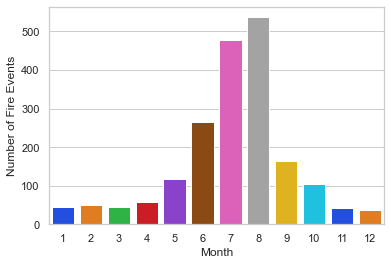

In [155]:
ax = sns.barplot(x = 'Month', y = 'Number of Fire Events', data = fireBy_month.reset_index(), palette='bright')


In [131]:
fire_data_4years = fire_df[fire_df['Year'].isin([2017, 2018, 2019, 2020])]

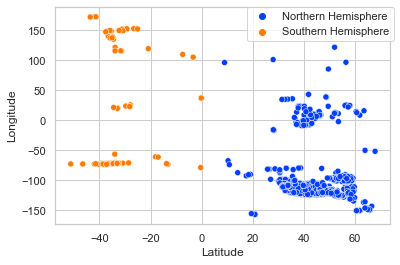

In [121]:
sns.set_style("whitegrid")
sns.set_palette('bright')
sns.set_context("notebook")
sns.scatterplot(x='Latitude', y='Longitude', data=fire_data_4years, hue='Hemisphere', palette = 'bright')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [ ]:
sns.set_style("whitegrid")
sns.set_palette('bright')
sns.set_context("notebook")
sns.scatterplot(x='Month', y='', data=fire_data_4years, hue='Hemisphere', palette = 'bright')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)